# **Data Wrangling**

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [8]:
# Load the dataset
file_path = 'DataScience_salaries_2024.csv'
df = pd.read_csv(file_path)

In [10]:
# Display the first few rows and general information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


(None,
    work_year experience_level employment_type                       job_title  \
 0       2021               MI              FT                  Data Scientist   
 1       2021               MI              FT                 BI Data Analyst   
 2       2020               MI              FT                  Data Scientist   
 3       2021               MI              FT                     ML Engineer   
 4       2022               SE              FT  Lead Machine Learning Engineer   
 
      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
 0  30400000             CLP          40038                 CL           100   
 1  11000000             HUF          36259                 HU            50   
 2  11000000             HUF          35735                 HU            50   
 3   8500000             JPY          77364                 JP            50   
 4   7500000             INR          95386                 IN            50   
 
   company_locati

The dataset is successfully loaded. It contains information about the work year, experience level, job title, salary, and company details. Now, I will proceed with the descriptive statistics to understand the central tendency, dispersion, and shape of the dataset's distribution.

# **Data availability Checking**

In [11]:
# Generate descriptive statistics
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,14838.000000,14838,14838,14838,1.483800e+04,14838,14838.000000,14838,14838.000000,14838,14838
unique,NaN,4,4,153,NaN,23,NaN,88,NaN,77,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,9696,14772,3162,NaN,13682,NaN,12926,NaN,12975,13674
mean,2023.138900,NaN,NaN,NaN,1.650227e+05,NaN,149874.718763,NaN,32.760480,NaN,NaN
std,0.700799,NaN,NaN,NaN,3.562354e+05,NaN,69009.181349,NaN,46.488278,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2023.000000,NaN,NaN,NaN,1.021000e+05,NaN,102000.000000,NaN,0.000000,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,1.422000e+05,NaN,141300.000000,NaN,0.000000,NaN,NaN
75%,2024.000000,NaN,NaN,NaN,1.875000e+05,NaN,185900.000000,NaN,100.000000,NaN,NaN


The dataset contains 14838 entries. The mean work year is 2023.14, and the data ranges from 2020 to 2024. The most frequent experience level is 'SE', and the most common company location is 'US'. Now, I will perform exploratory data analysis to find correlations in the dataset.

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical variables to numerical
for column in df_encoded.columns:
    if df_encoded[column].dtype == type(object):
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Check the correlation between the numerical variables
df_encoded.corr()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,-0.051815,0.032498,0.005624,-0.074329,0.152935,0.090873,0.118360,-0.204954,0.112321,0.109672
experience_level,-0.051815,1.000000,-0.000917,0.067962,0.020888,0.155595,0.275477,0.128163,0.009351,0.126746,0.016498
employment_type,0.032498,-0.000917,1.000000,-0.010995,-0.001111,0.014042,0.010881,0.019209,-0.033198,0.015053,-0.034997
job_title,0.005624,0.067962,-0.010995,1.000000,0.055381,0.014565,0.223732,0.012267,-0.069879,0.008370,0.092545
salary,-0.074329,0.020888,-0.001111,0.055381,1.000000,-0.045708,0.128313,-0.036136,0.019249,-0.028867,-0.086522
salary_currency,0.152935,0.155595,0.014042,0.014565,-0.045708,1.000000,0.312133,0.662922,-0.042264,0.667672,0.078490
salary_in_usd,0.090873,0.275477,0.010881,0.223732,0.128313,0.312133,1.000000,0.246008,-0.064829,0.243811,-0.004806
employee_residence,0.118360,0.128163,0.019209,0.012267,-0.036136,0.662922,0.246008,1.000000,-0.063957,0.977218,0.020902
remote_ratio,-0.204954,0.009351,-0.033198,-0.069879,0.019249,-0.042264,-0.064829,-0.063957,1.000000,-0.057140,0.017271
company_location,0.112321,0.126746,0.015053,0.008370,-0.028867,0.667672,0.243811,0.977218,-0.057140,1.000000,0.022531


The correlation matrix shows the relationship between the variables. The 'employee_residence' and 'company_location' have a high correlation of 0.977, indicating that they move almost identically. The 'salary_currency' and 'company_location' also have a significant correlation of 0.668. Now, I will visualize the data to better understand these relationships.


In [13]:
with open('preprocessed_data.pkl', 'wb') as file:
    pickle.dump(df_encoded, file)

print("File 'preprocessed_data.pkl' berhasil dibuat!")

File 'preprocessed_data.pkl' berhasil dibuat!


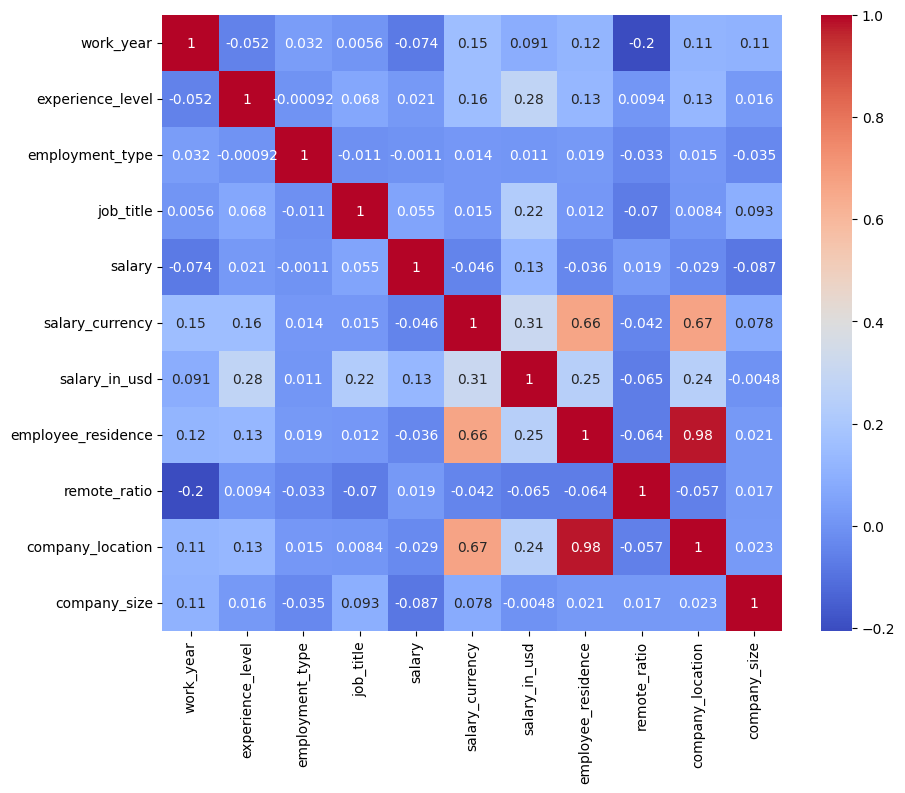

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')

# Display the plot
plt.show()

The correlation matrix plot provides a visual representation of the relationships between variables. The darker and lighter colors represent strong correlations.

experience_level
SE    9696
MI    3553
EN    1148
EX     441
Name: count, dtype: int64


<ipython-input-15-7d851c52d3e4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience_level', data=df, palette='Set2')


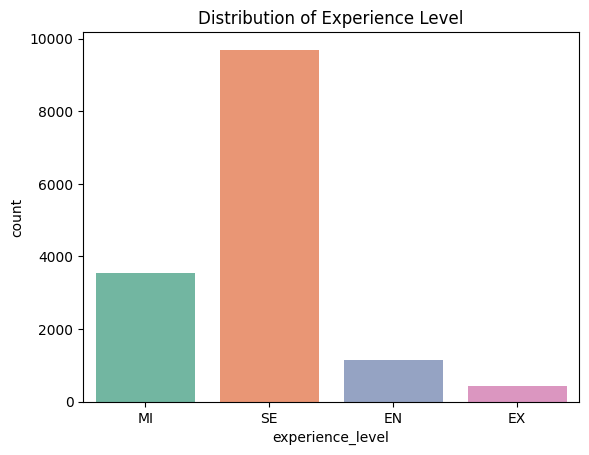

In [15]:
# Distribution of experience_level
print(df['experience_level'].value_counts())

# Visualization
sns.countplot(x='experience_level', data=df, palette='Set2')
plt.title('Distribution of Experience Level')
plt.show()

count     14838.000000
mean     149874.718763
std       69009.181349
min       15000.000000
25%      102000.000000
50%      141300.000000
75%      185900.000000
max      800000.000000
Name: salary_in_usd, dtype: float64


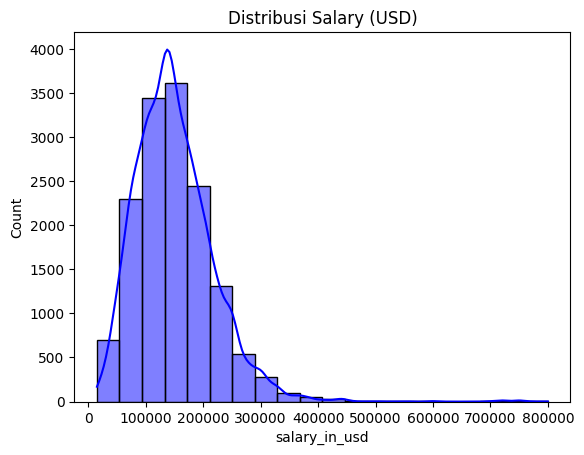

In [16]:
# Statistik deskriptif
print(df['salary_in_usd'].describe())

# Histogram
sns.histplot(df['salary_in_usd'], bins=20, kde=True, color='blue')
plt.title('Distribusi Salary (USD)')
plt.show()

<ipython-input-17-6afbf0b311d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='remote_ratio', data=df, palette='muted')


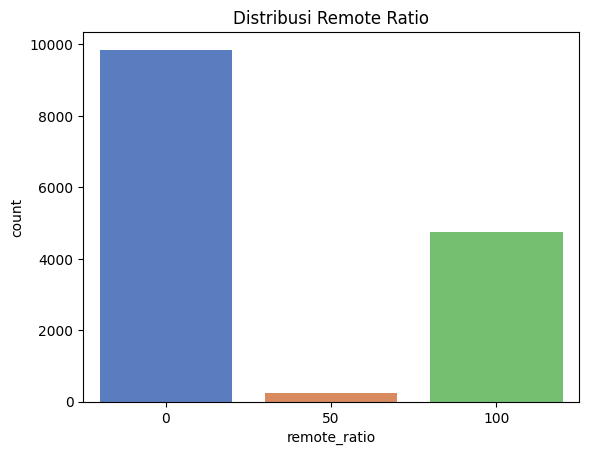

In [17]:
# Distribusi remote_ratio
sns.countplot(x='remote_ratio', data=df, palette='muted')
plt.title('Distribusi Remote Ratio')
plt.show()